In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv(r'E:\Mumbai Flat Real Estate Intelligence\datasets\mumbai_properties_missing_value_imputation.csv')


In [4]:
df.shape

(9614, 8)

In [5]:
df.head()

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
0,0.17,1,1,2,New_property,Nalasopara West,550.0,Furnished
1,0.18,1,1,0,New_property,others,665.0,Furnished
2,0.18,1,1,2,New_property,Palghar,630.0,Furnished
3,0.18,1,1,2,New_property,Palghar,630.0,Unfurnished
4,0.18,1,2,1,New_property,Palghar,630.0,Furnished


In [6]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['0', '1', '2', '3', '3+'], dtype=object)]
[array(['Mid Age', 'New_property', 'Old', 'Relatively New'], dtype=object)]
[array(['Agripada', 'Andheri East', 'Andheri West', 'Bandra East',
       'Bandra West', 'Bhandup East', 'Bhandup West', 'Bhayandar East',
       'Bhayandar West', 'Bhoiwada', 'Boisar', 'Bolinj', 'Borivali East',
       'Borivali West', 'Byculla', 'Chakala', 'Chembur',
       'Chikhal Dongari', 'Churchgate', 'Colaba', 'Cuffe Parade',
       'Cumballa Hill', 'Dadar East', 'Dadar West', 'Dahisar',
       'Dahisar East', 'Dahisar West', 'Dattapada', 'Deonar',
       'Evershine Nagar', 'Gandhi Nagar', 'Ghatkopar East',
       'Ghatkopar West', 'Girgaon', 'Goregaon', 'Goregaon East',
       'Goregaon West', 'Govandi', 'Hindu Colony', 'Hmpl Surya Nagar',
       'Jogeshwari East', 'Jogeshwari West', 'Juhu', 'Juhu Scheme',
       'Jvpd Scheme', 'Kala Nagar', 'Kamathipura', 'Kanchpada',
       'Kandivali East', 'Kandivali West', 'Kanjurmarg East',
       'Kanjurmarg West

In [7]:
X_label

,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
0,1,1,2.0,1.0,79.0,550.0,0.0
1,1,1,0.0,1.0,114.0,665.0,0.0
2,1,1,2.0,1.0,81.0,630.0,0.0
3,1,1,2.0,1.0,81.0,630.0,1.0
4,1,2,1.0,1.0,81.0,630.0,0.0
...,...,...,...,...,...,...,...
9609,5,5,0.0,2.0,64.0,3699.0,1.0
9610,5,5,0.0,0.0,64.0,3181.0,0.0
9611,5,6,1.0,2.0,64.0,2850.0,0.0
9612,6,4,3.0,0.0,57.0,5042.0,0.0


In [8]:
y_label

0        0.17
1        0.18
2        0.18
3        0.18
4        0.18
        ...  
9609    27.00
9610    29.00
9611    29.00
9612    29.00
9613    30.00
Name: price, Length: 9614, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

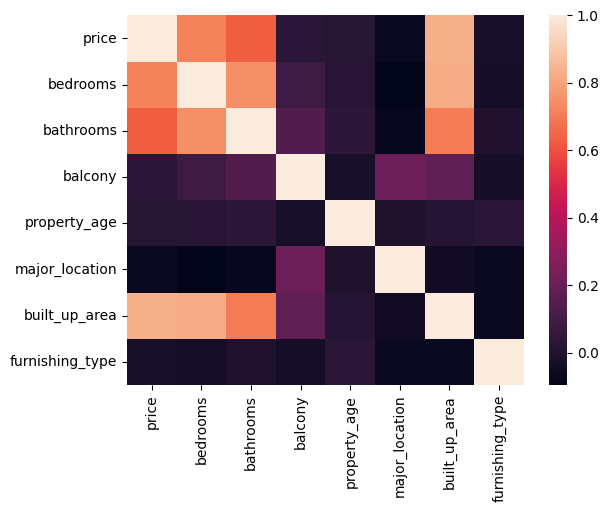

In [9]:
sns.heatmap(data_label_encoded.corr())

In [10]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,bedrooms,0.714328
1,bathrooms,0.630293
2,balcony,0.026445
3,property_age,0.017908
4,major_location,-0.068890
5,built_up_area,0.830059
6,furnishing_type,-0.025359


### Technique 2 - Random Forest Feature Importance

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
5,built_up_area,0.749921
4,major_location,0.130391
0,bedrooms,0.034528
2,balcony,0.029306
3,property_age,0.026971
1,bathrooms,0.018811
6,furnishing_type,0.010072


### Technique 3 - Gradient Boosting Feature importances

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
5,built_up_area,0.781959
4,major_location,0.111815
0,bedrooms,0.061443
1,bathrooms,0.015607
3,property_age,0.014600
2,balcony,0.013928
6,furnishing_type,0.000649


### Technique 4 - Permutation Importance

In [13]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
5,built_up_area,1.080527
4,major_location,0.145067
3,property_age,0.035029
0,bedrooms,0.029241
2,balcony,0.019736
1,bathrooms,0.016129
6,furnishing_type,0.002336


### Technique 5 - LASSO

In [14]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
5,built_up_area,2.340130
1,bathrooms,0.241788
0,bedrooms,0.096831
6,furnishing_type,0.057353
4,major_location,0.000000
3,property_age,-0.000000
2,balcony,-0.353210


### Technique 6 - RFE

In [15]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
5,built_up_area,0.752401
4,major_location,0.128679
0,bedrooms,0.033167
2,balcony,0.029541
3,property_age,0.026784
1,bathrooms,0.018830
6,furnishing_type,0.010598


### Technique 7 - Linear Regression Weights


In [16]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
5,built_up_area,2.348487
1,bathrooms,0.247713
0,bedrooms,0.098275
6,furnishing_type,0.068301
4,major_location,0.010420
3,property_age,-0.002922
2,balcony,-0.367421


In [17]:
!pip install shap

In [18]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

e:\Mumbai Flat Real Estate Intelligence\mumbai_flat_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[-4.50573619e-01, -2.75570178e-03, -2.24829907e-01, ...,
        -4.43669584e-01, -1.72699879e+00,  6.75446163e-04],
       [-5.96699695e-01,  2.20107464e-02,  7.71715632e-02, ...,
         1.32620012e-01, -2.02698916e+00, -6.84390776e-03],
       [-8.14237006e-01,  8.18452858e-03, -2.63367043e-01, ...,
         3.28046933e-02, -1.85950386e+00, -6.50319272e-04],
       ...,
       [ 5.40455045e-01,  7.55545885e-01,  4.05566069e-01, ...,
         4.36755162e+00,  1.32429912e+01, -1.58531183e-01],
       [ 7.85198941e-01,  2.01785864e-02, -1.45902299e-01, ...,
         9.10042477e-01,  1.88391029e+01,  8.77229896e-01],
       [ 6.61172560e-01,  1.08233790e-01,  2.65024191e-02, ...,
         5.22446713e+00,  1.43268711e+01,  6.35519503e-01]],
      shape=(9614, 7))

In [19]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
5,built_up_area,1.671667
4,major_location,0.504271
0,bedrooms,0.295652
2,balcony,0.168271
3,property_age,0.119564
1,bathrooms,0.075747
6,furnishing_type,0.032910


In [20]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')


In [21]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
bedrooms,0.714328,0.034528,0.061443,0.029241,0.096831,0.033167,0.098275,0.295652
bathrooms,0.630293,0.018811,0.015607,0.016129,0.241788,0.018830,0.247713,0.075747
balcony,0.026445,0.029306,0.013928,0.019736,-0.353210,0.029541,-0.367421,0.168271
property_age,0.017908,0.026971,0.014600,0.035029,-0.000000,0.026784,-0.002922,0.119564
major_location,-0.068890,0.130391,0.111815,0.145067,0.000000,0.128679,0.010420,0.504271
built_up_area,0.830059,0.749921,0.781959,1.080527,2.340130,0.752401,2.348487,1.671667
furnishing_type,-0.025359,0.010072,0.000649,0.002336,0.057353,0.010598,0.068301,0.032910


In [22]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)


In [23]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.736149
major_location     0.131187
bedrooms           0.050848
balcony            0.029261
property_age       0.027284
bathrooms          0.018361
furnishing_type    0.006910
dtype: float64

In [24]:
# to drop pooja room, study room, others
X_label

,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
0,1,1,2.0,1.0,79.0,550.0,0.0
1,1,1,0.0,1.0,114.0,665.0,0.0
2,1,1,2.0,1.0,81.0,630.0,0.0
3,1,1,2.0,1.0,81.0,630.0,1.0
4,1,2,1.0,1.0,81.0,630.0,0.0
...,...,...,...,...,...,...,...
9609,5,5,0.0,2.0,64.0,3699.0,1.0
9610,5,5,0.0,0.0,64.0,3181.0,0.0
9611,5,6,1.0,2.0,64.0,2850.0,0.0
9612,6,4,3.0,0.0,57.0,5042.0,0.0


In [25]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [26]:
scores.mean()

np.float64(-10.62957288609775)

In [27]:
export_df = X_label
export_df['price'] = y_label

In [28]:
export_df.to_csv('mumbai_properties_post_feature_selection.csv', index=False)


In [29]:

export_df

,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type,price
0,1,1,2.0,1.0,79.0,550.0,0.0,0.17
1,1,1,0.0,1.0,114.0,665.0,0.0,0.18
2,1,1,2.0,1.0,81.0,630.0,0.0,0.18
3,1,1,2.0,1.0,81.0,630.0,1.0,0.18
4,1,2,1.0,1.0,81.0,630.0,0.0,0.18
...,...,...,...,...,...,...,...,...
9609,5,5,0.0,2.0,64.0,3699.0,1.0,27.00
9610,5,5,0.0,0.0,64.0,3181.0,0.0,29.00
9611,5,6,1.0,2.0,64.0,2850.0,0.0,29.00
9612,6,4,3.0,0.0,57.0,5042.0,0.0,29.00


In [30]:
df.sample()

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
8543,6.5,4,3,0,New_property,Mahim,1562.0,Furnished


In [31]:
df.to_csv('mumbai_properties_post_feature_selection_v2.csv', index=False)